# Advanced Regression Assignment
## Part l

1.	Business understanding
2.	Data understanding
3.	Data Cleaning and Preparation
4.	Model Building and Evaluation

### 1. Business understanding
A US-based housing company has decided to enter the Australian market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 2. Data Understanding and Exploration

### Undertsanding the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [2]:
#Checking how many rows and columns we have in our dataset
housing.shape

(1460, 81)

In [3]:
#checking column names and types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# identifying rows and columns having All missing values
print("Rows with all missing values : ", housing.isnull().all(axis=1).sum())
print("Columns with all missing values : ",housing.isnull().all(axis=0).sum())

Rows with all missing values :  0
Columns with all missing values :  0


### Understanding the Data Dictionary and the Data

### Understanding the Target Variable : ```SalePrice```

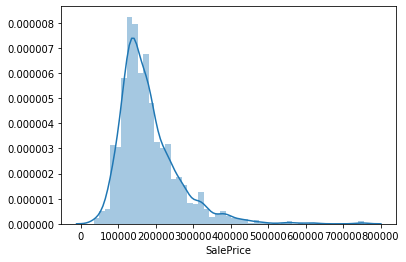

In [5]:
# target variable: SalePrice
sns.distplot(housing['SalePrice'])
plt.show()

**We see that the Price of the house in the dataset we have, is mainly around 100K to 300K, and but few lie above the 300k range. Since, the data is skewed let us transform the ```SalePrice``` variable, so we have a normal distribution.**

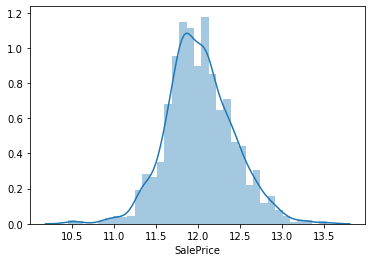

In [6]:
#Transforming the SalePrice variable 
housing['SalePrice'] = np.log(housing['SalePrice'])
# the transformed target variable: SalePrice
sns.distplot(housing['SalePrice'])
plt.show()

From the data dictionary, we see that-
- ```Id``` column is just a row identifier.
- Columns ```YrSold``` and ```MoSold``` are actually leaking data from the future.
- ```GarageCars``` and ```GarageArea``` are both sizes of the Garage in car capacity and square feet respectively. So it is safe to drop once of them.
- ```MSSubClass``` which is int/float is actually categorical variable. 

In [7]:
# Dropping columns Id , YrSold, MoSold
housing = housing.drop(['Id','YrSold','MoSold','GarageCars'], axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea PoolQC  \
0         Lvl    AllPub    Inside  ...         0           0        0    NaN   
1         Lvl    AllPub       FR2  ...         0           0        0    NaN   
2         Lvl    AllPub    Inside  ...         0           0        0    NaN   
3         Lvl    AllPub    Corner  ...         0           0        0    NaN   
4         Lvl    AllPub       FR2  ...         0           0        0    NaN   

  Fence MiscFeature  MiscVal  SaleType  SaleCondition  SalePrice  
0   NaN         NaN        0        WD         Normal  12.247694  
1   NaN         NaN        0        WD         Normal  12.109011  
2   NaN         NaN        0        WD         Normal  12.317167  
3   NaN         NaN        0        WD        Abnorml  11.849398  
4   NaN         NaN        0        WD         Normal  12.429216  

[5 rows x 77 columns]

In [8]:
#Let us convert MSSubClass column to categorical.
housing['MSSubClass'] = housing.MSSubClass.astype('object')

Dividing our dataset into numeric and categorical variables to understand whar kind of data is present in them.

In [9]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['int64','float64'])
housing_numeric.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageYrBlt  \
0       196.0         706           0        150  ...       2003.0   
1         0.0         978           0        284  ...       1976.0   
2       162.0         486           0        434  ...       2001.0   
3         0.0         216           0        540  ...       1998.0   
4       350.0         655           0        490  ...       2000.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  
0         0        0  12.247694  
1         0        0  12.109011  
2         0        0  12.317167  
3         0        0  11.849398  
4         0        0  12.429216  

[5 rows x 33 columns]

In [10]:
# subset of all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageType GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
1       Gtl      Veenker  ...     Attchd          RFn         TA         TA   
2       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
3       Gtl      Crawfor  ...     Detchd          Unf         TA         TA   
4       Gtl      NoRidge  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 44 columns]

### Understanding Categorical data

Let see how the **Categorical variables** are distributed accross SalePrice.

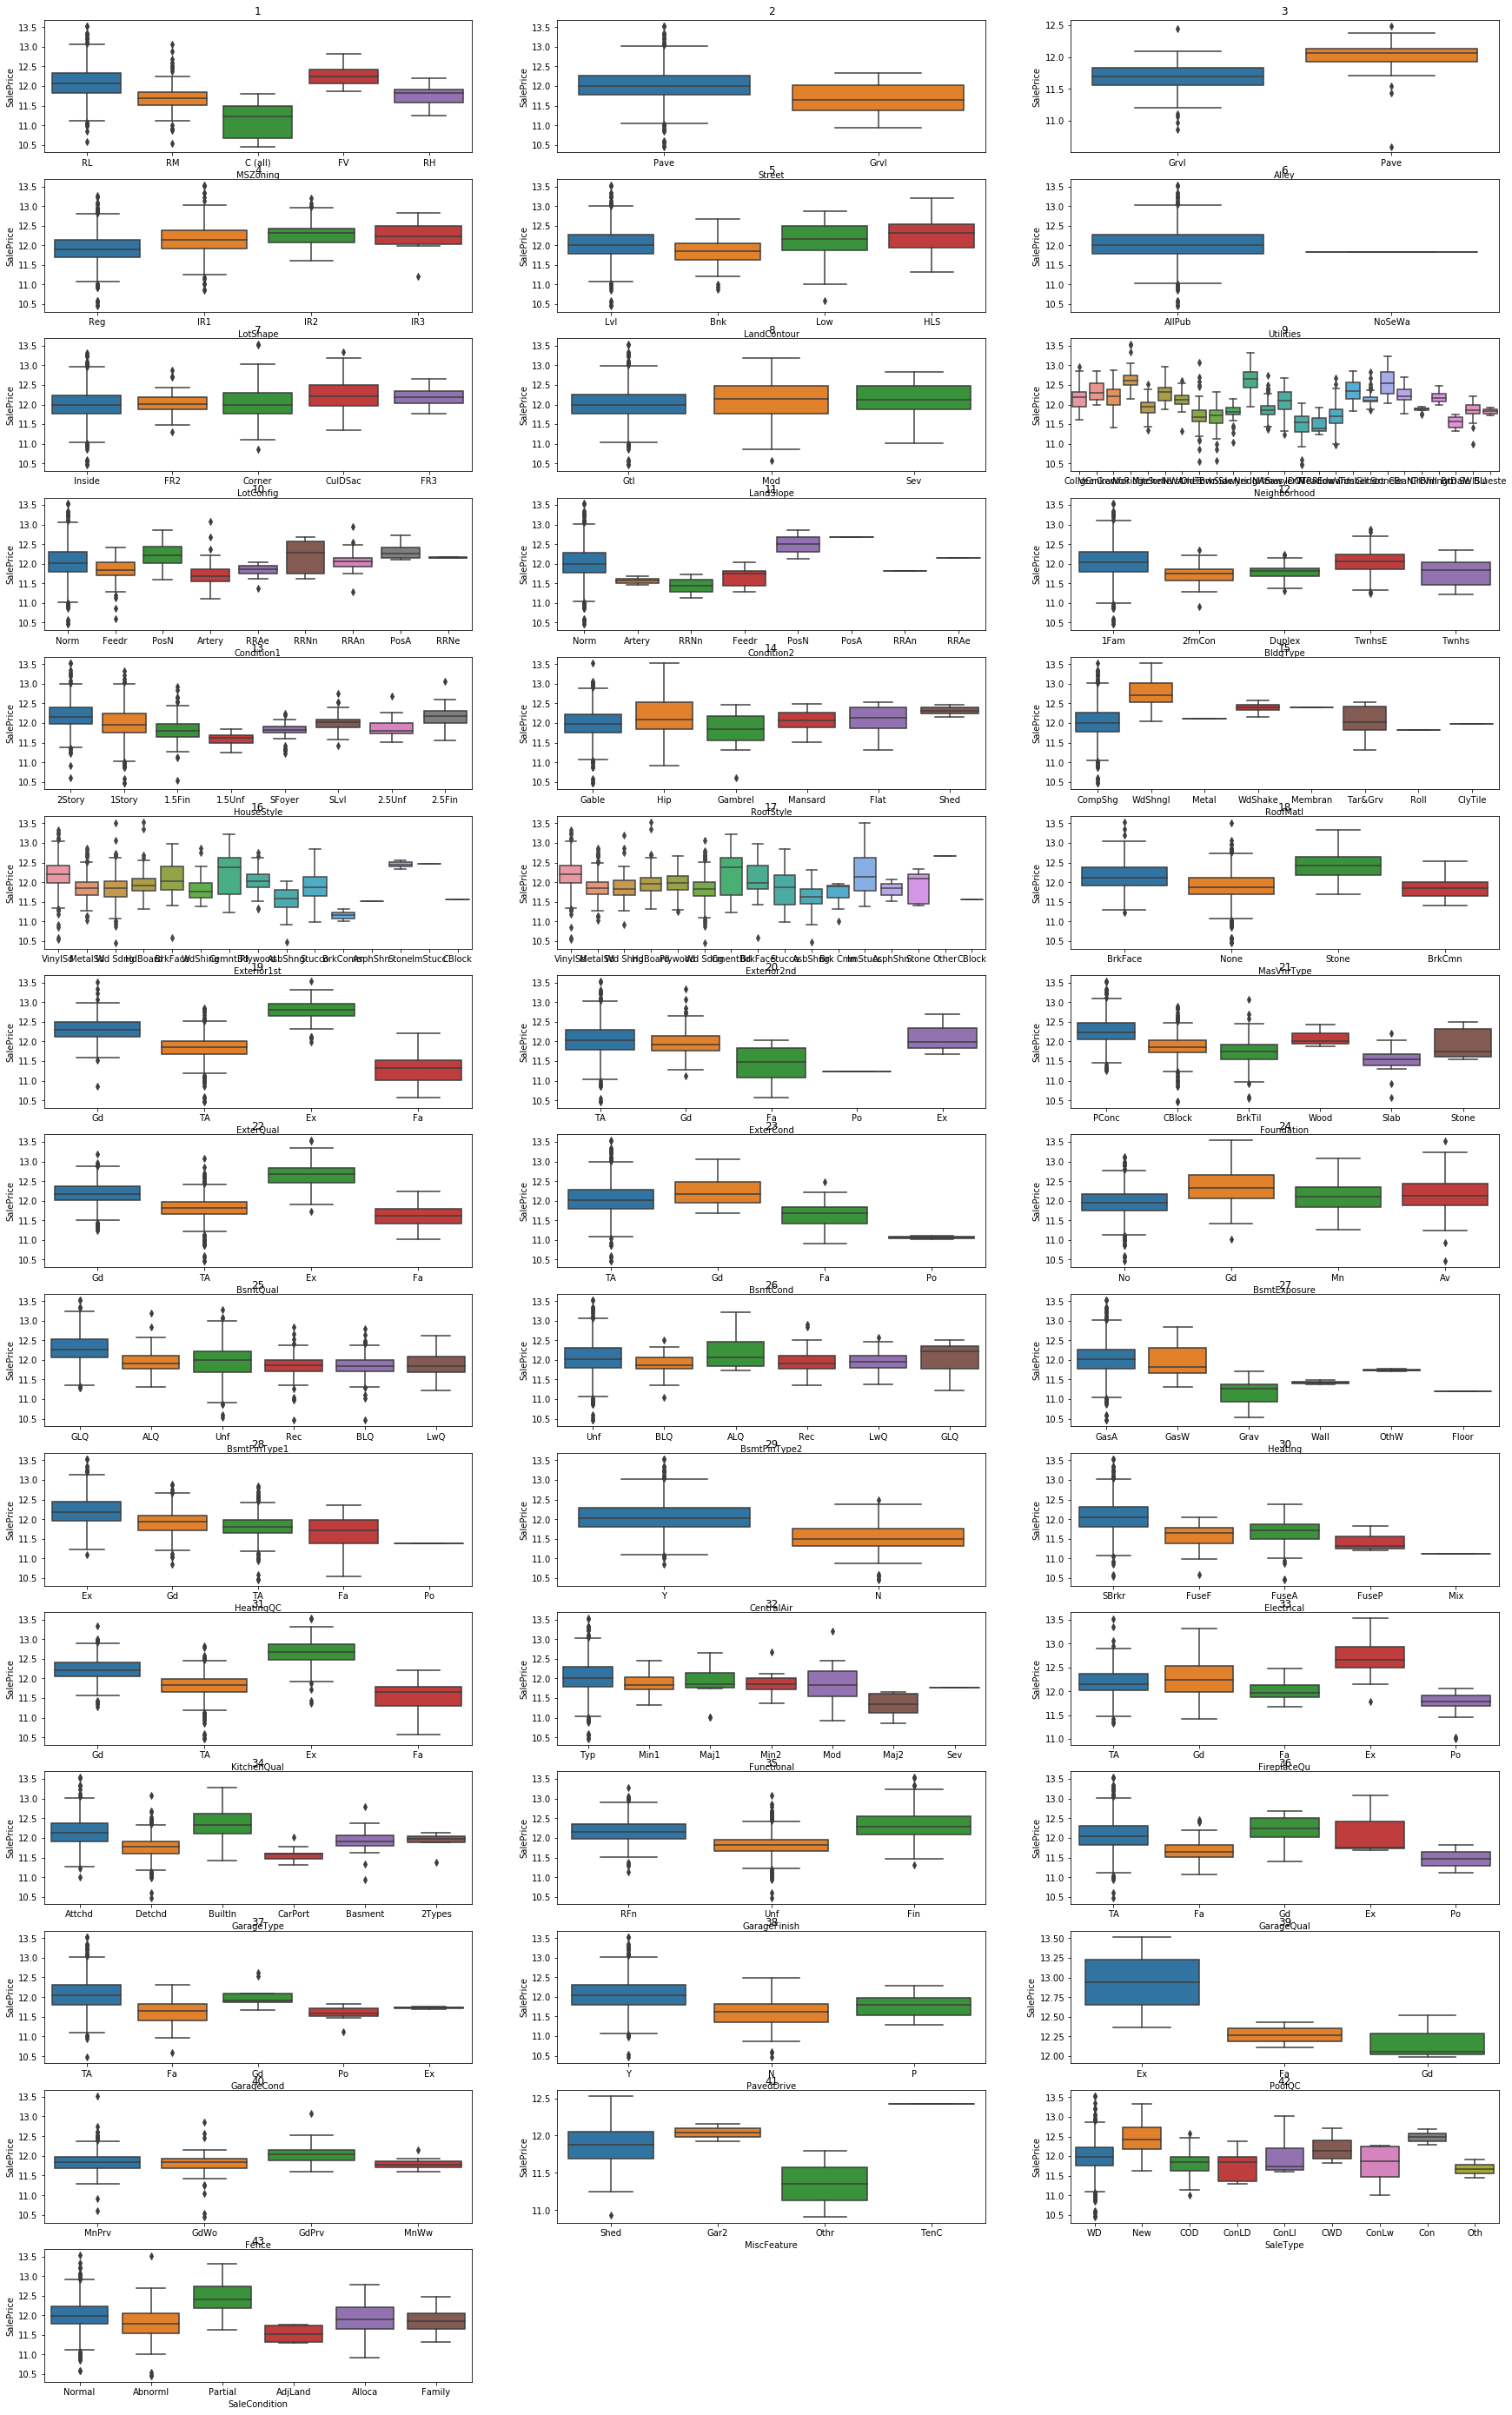

In [11]:
# Plotting boxplots of all categorical variables across SalePrices

plt.figure(figsize=(30, 50))
        
for col in range(1, housing_categorical.shape[1]):
    plt.subplot(15,3,col)
    sns.boxplot(x=housing_categorical.columns[col], y='SalePrice', data=housing)
    plt.title(col)
    
plt.show()

The boxplots show us that there is indeed some trend across the Saleprice for the categorical variables.
Let us also try to create point plots(with median values so we do not consider any outliers) for all the above and since the boxplots for these clearly have outliers and do not give us exact conclusion.

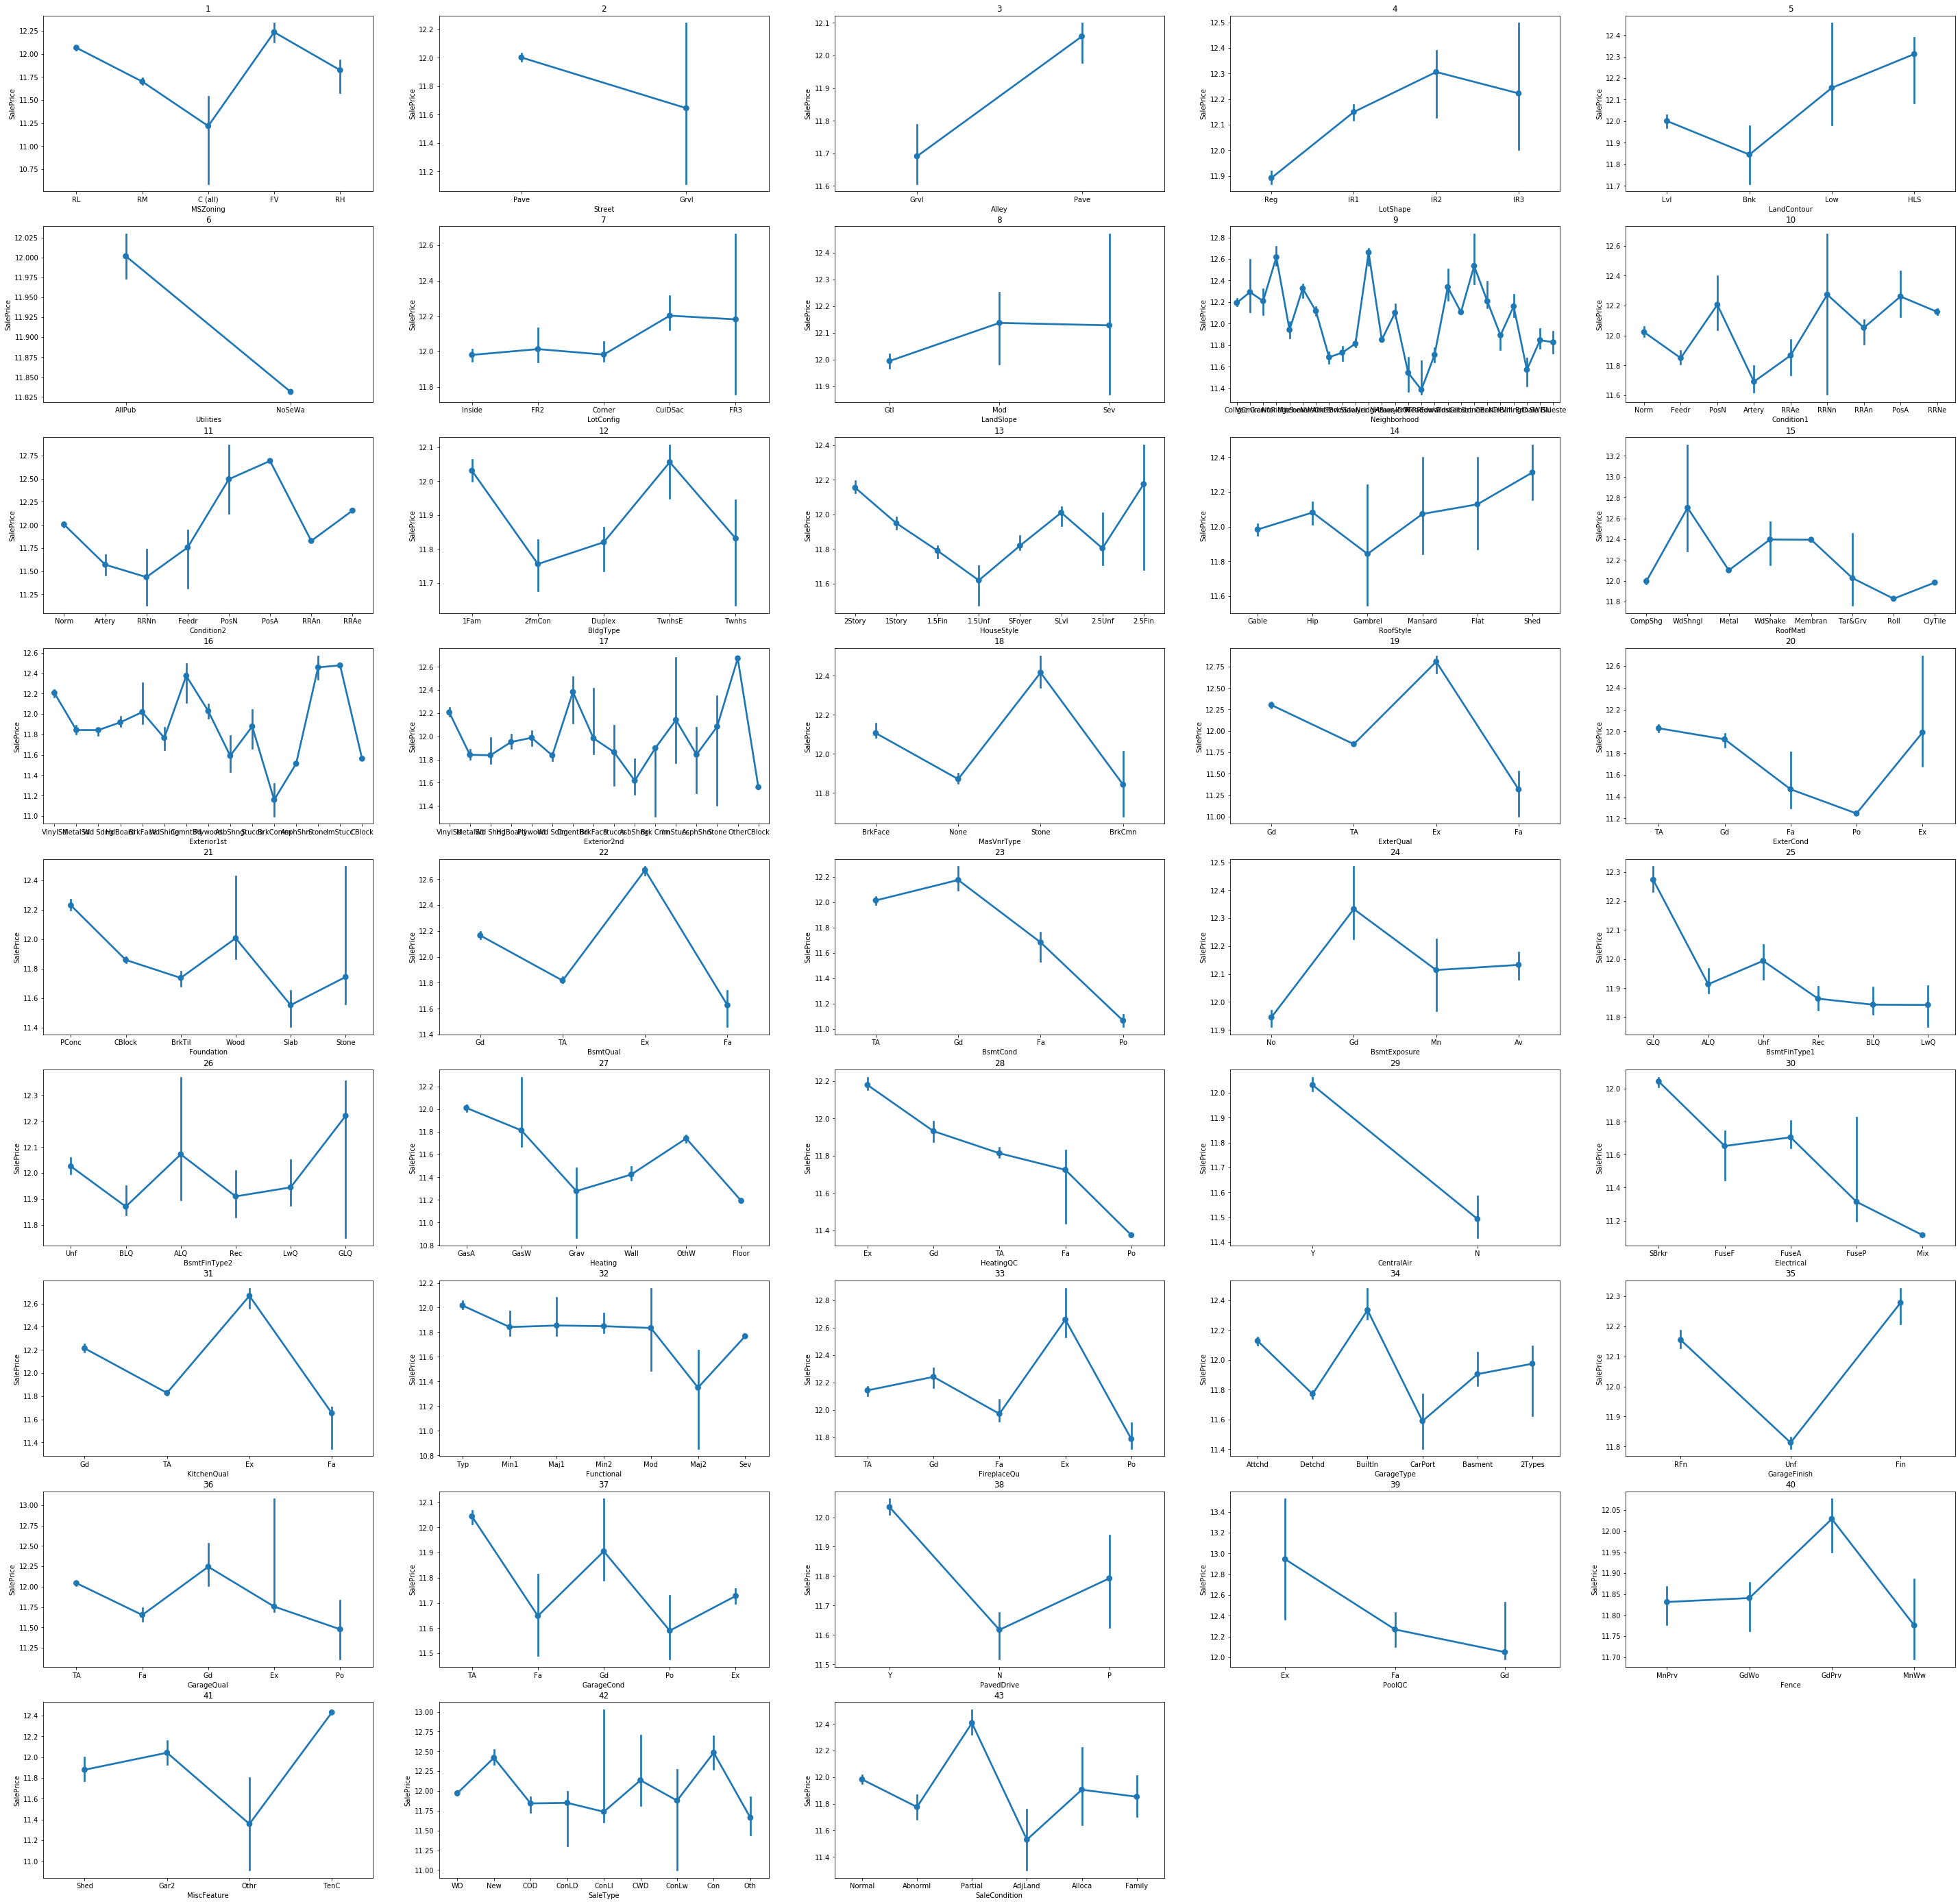

In [12]:
# Plotting pointplots of all categorical variables across SalePrice
plt.figure(figsize=(50, 50))
        
for col in range(1, housing_categorical.shape[1]):
    plt.subplot(9,5,col)
    sns.pointplot(x=housing_categorical.columns[col], y='SalePrice', data=housing,estimator=np.median)
    plt.title(col)
    
plt.show()

So, from the pointplots above we see there is indeed some correlations between the categorical variables and the salesprice.

#### Let us check what kind of values are present in the categorical columns.

In [13]:
print(housing_categorical.nunique())

MSSubClass       15
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [14]:
#Checking the percentage of the values of the highest occuring value and 
# find the columns with highly skewed distributions(more than 90 percent same values).
skewed_cols= []
for col in housing_categorical.columns:
    maxval =(100*housing[col].astype('category').value_counts()/len(housing.index)).max()
    print(col," ",maxval)
    if maxval > 90.00:
        skewed_cols.append(col)
        

MSSubClass   36.71232876712329
MSZoning   78.83561643835617
Street   99.58904109589041
Alley   3.4246575342465753
LotShape   63.35616438356164
LandContour   89.79452054794521
Utilities   99.93150684931507
LotConfig   72.05479452054794
LandSlope   94.65753424657534
Neighborhood   15.41095890410959
Condition1   86.3013698630137
Condition2   98.97260273972603
BldgType   83.56164383561644
HouseStyle   49.726027397260275
RoofStyle   78.15068493150685
RoofMatl   98.21917808219177
Exterior1st   35.273972602739725
Exterior2nd   34.52054794520548
MasVnrType   59.178082191780824
ExterQual   62.054794520547944
ExterCond   87.8082191780822
Foundation   44.31506849315068
BsmtQual   44.45205479452055
BsmtCond   89.79452054794521
BsmtExposure   65.27397260273973
BsmtFinType1   29.45205479452055
BsmtFinType2   86.02739726027397
Heating   97.8082191780822
HeatingQC   50.75342465753425
CentralAir   93.4931506849315
Electrical   91.36986301369863
KitchenQual   50.342465753424655
Functional   93.150684931

**We see that there are certain categorical columns that have highly skewed disctributions, where a certain value is occuring far more times than the other values, For e.g. ```Street``` has 99.5 Percent same values. Such columns will not give us useful insights hence, we will drop those columns.**

In [15]:
print("Skewed Columns List")
skewed_cols

Skewed Columns List


['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive']

In [16]:
#Dropping variables with highly skewed distributions
print("Dropping columns: ", skewed_cols)
housing = housing.drop(skewed_cols, axis=1)
housing.head()

Dropping columns:  ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0         60       RL         65.0     8450   NaN      Reg         Lvl   
1         20       RL         80.0     9600   NaN      Reg         Lvl   
2         60       RL         68.0    11250   NaN      IR1         Lvl   
3         70       RL         60.0     9550   NaN      IR1         Lvl   
4         60       RL         84.0    14260   NaN      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... 3SsnPorch ScreenPorch  PoolArea  \
0    Inside      CollgCr       Norm  ...         0           0         0   
1       FR2      Veenker      Feedr  ...         0           0         0   
2    Inside      CollgCr       Norm  ...         0           0         0   
3    Corner      Crawfor       Norm  ...         0           0         0   
4       FR2      NoRidge       Norm  ...         0           0         0   

   PoolQC  Fence  MiscFeature MiscVal SaleType SaleCondition  SalePrice  
0     NaN    NaN          NaN       0       WD        Normal  12.247694  
1     NaN    NaN          NaN       0       WD        Normal  12.109011  
2     NaN    NaN          NaN       0       WD        Normal  12.317167  
3     NaN    NaN          NaN       0       WD       Abnorml  11.849398  
4     NaN    NaN          NaN       0       WD        Normal  12.429216  

[5 rows x 66 columns]

### Understanding the Numerical Variables

In [17]:
print("Number of numeric variables: ",housing_numeric.columns.value_counts().sum())
print(housing_numeric.columns)

Number of numeric variables:  33
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.For all (independent) numeric variables we make a **pairwise plot**.

In [18]:
# Dividing the numeric variables so we can visualize the plot better
half = int(housing_numeric.columns.value_counts().sum()/2)
housing_numeric1 = housing_numeric.iloc[:,:half]
housing_numeric1 = pd.concat([housing_numeric1, housing['SalePrice']], axis=1, sort=False)
housing_numeric2 = housing_numeric.iloc[:,half:]

<Figure size 1440x720 with 0 Axes>

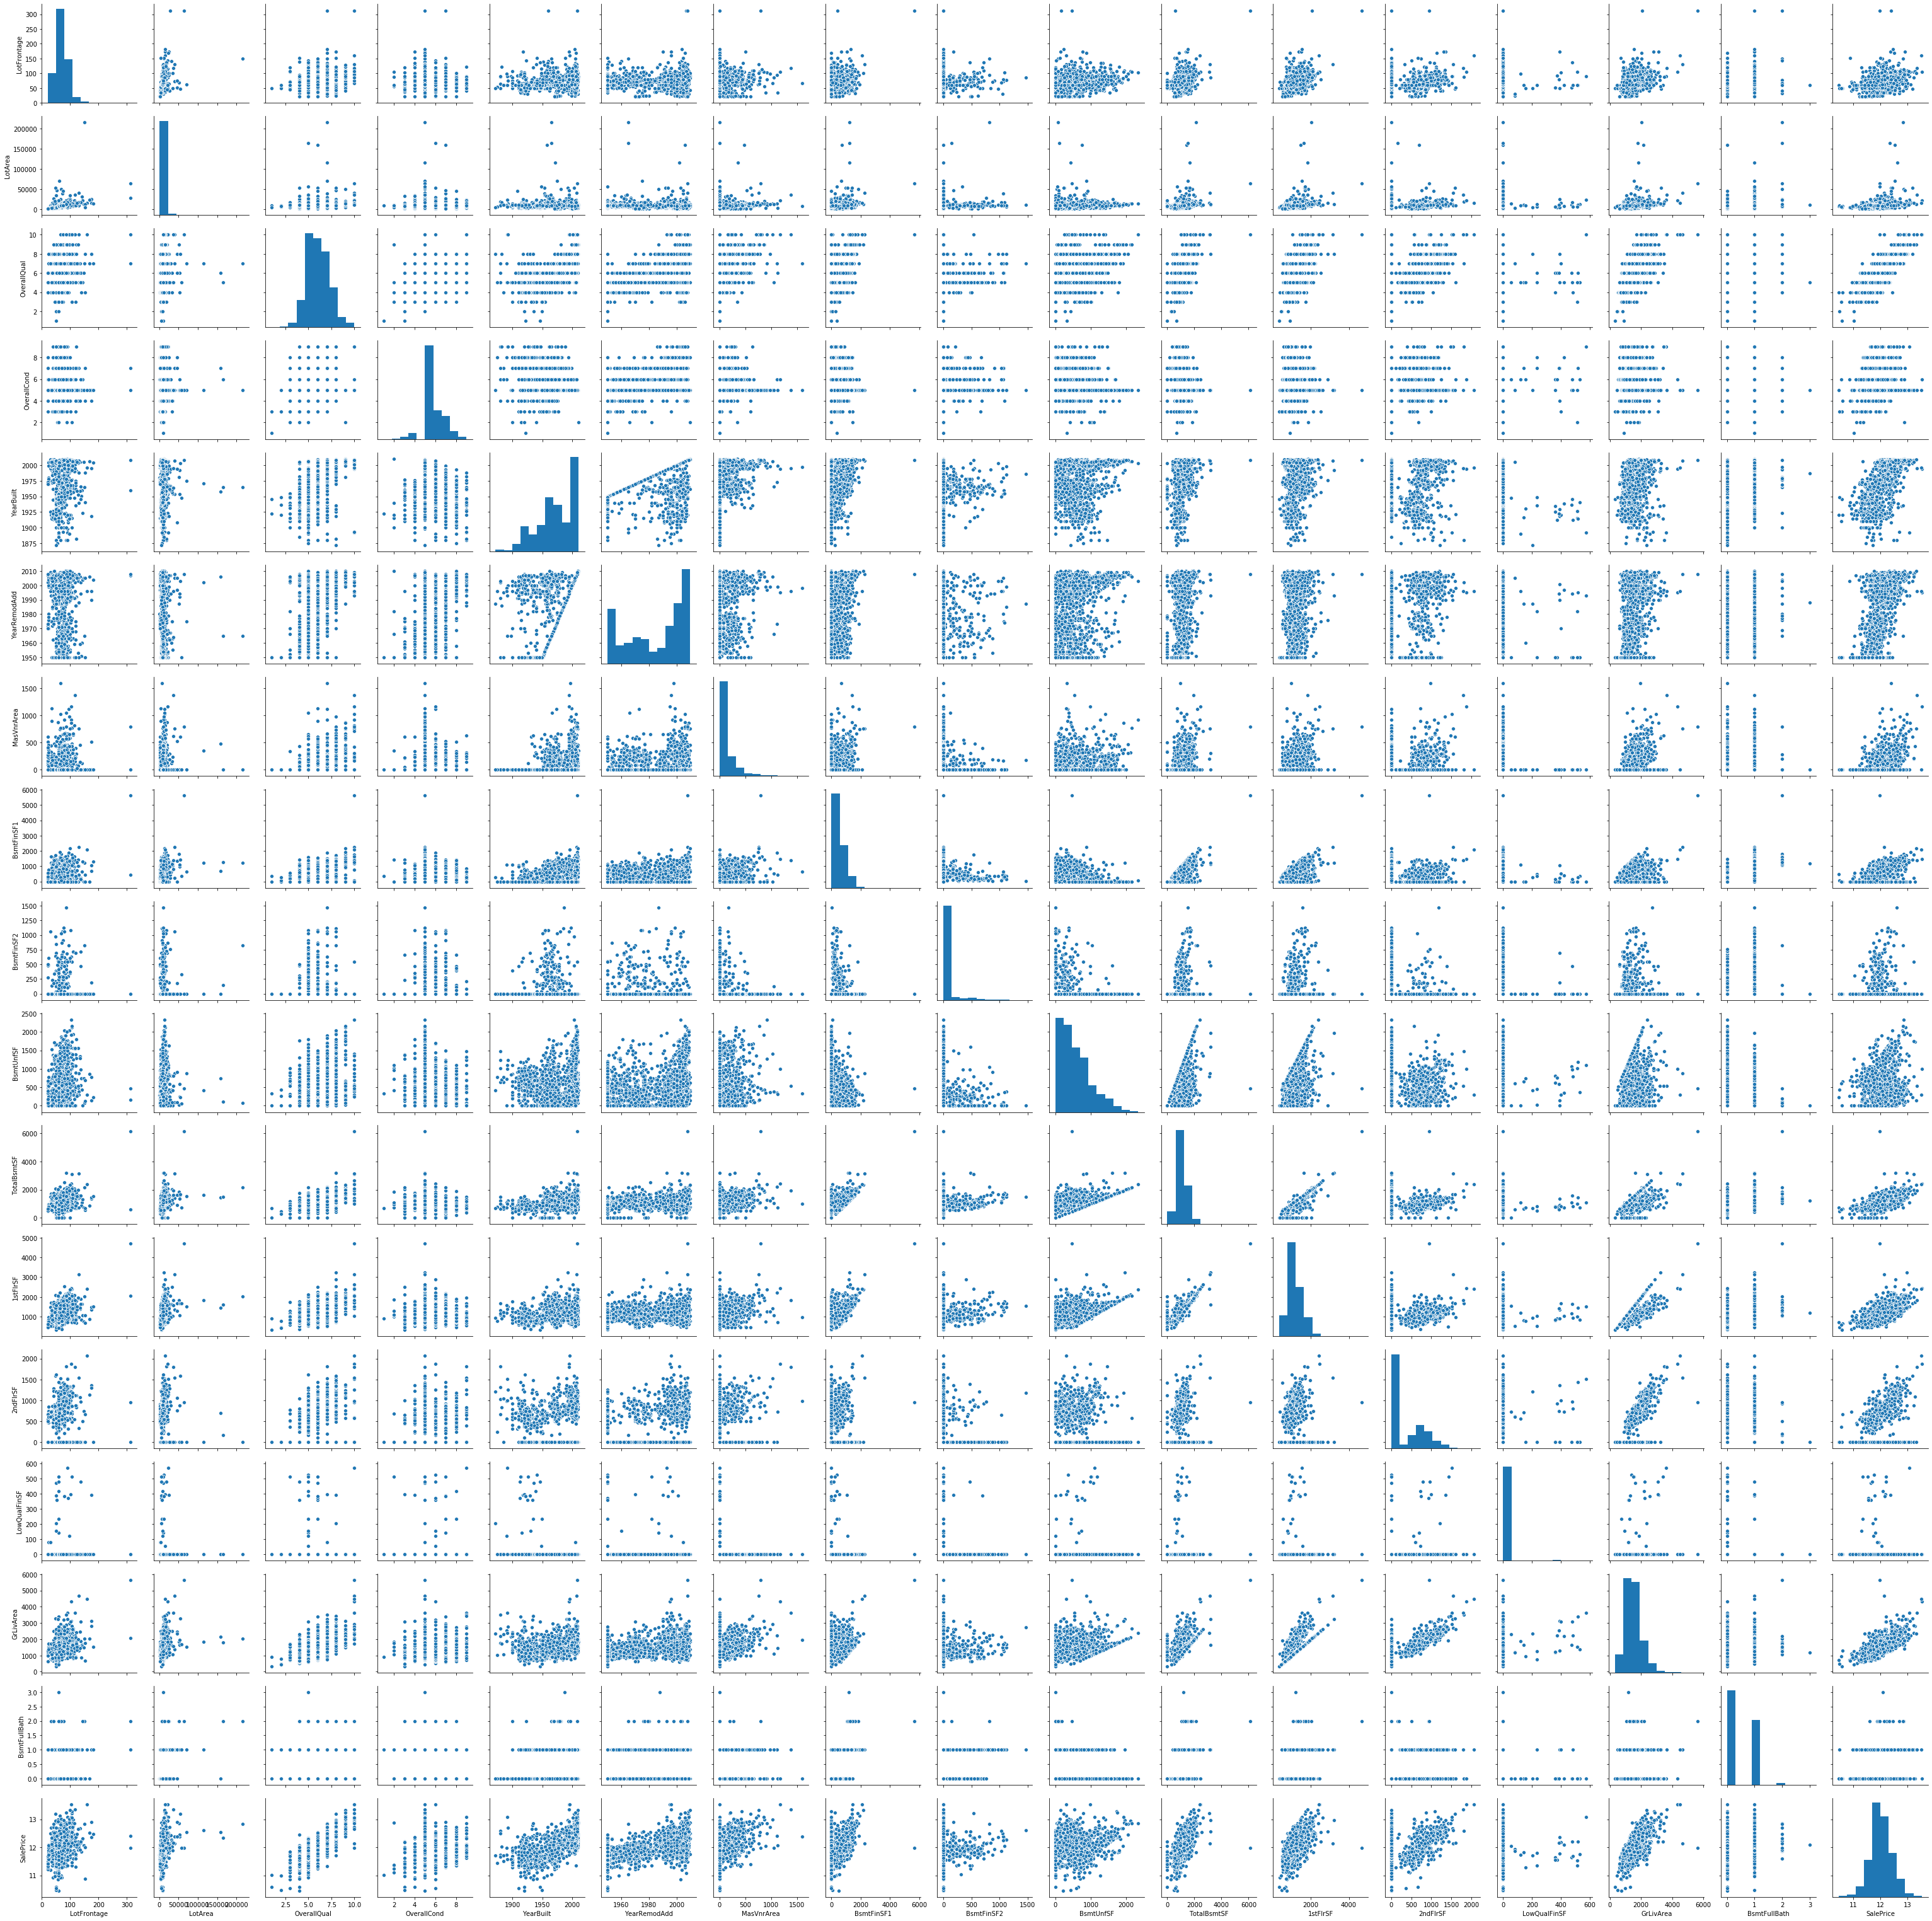

In [19]:
# paiwise scatter plot for housing_numeric1
plt.figure(figsize=(20, 10))
sns.pairplot(housing_numeric1)
plt.show()

<Figure size 1440x720 with 0 Axes>

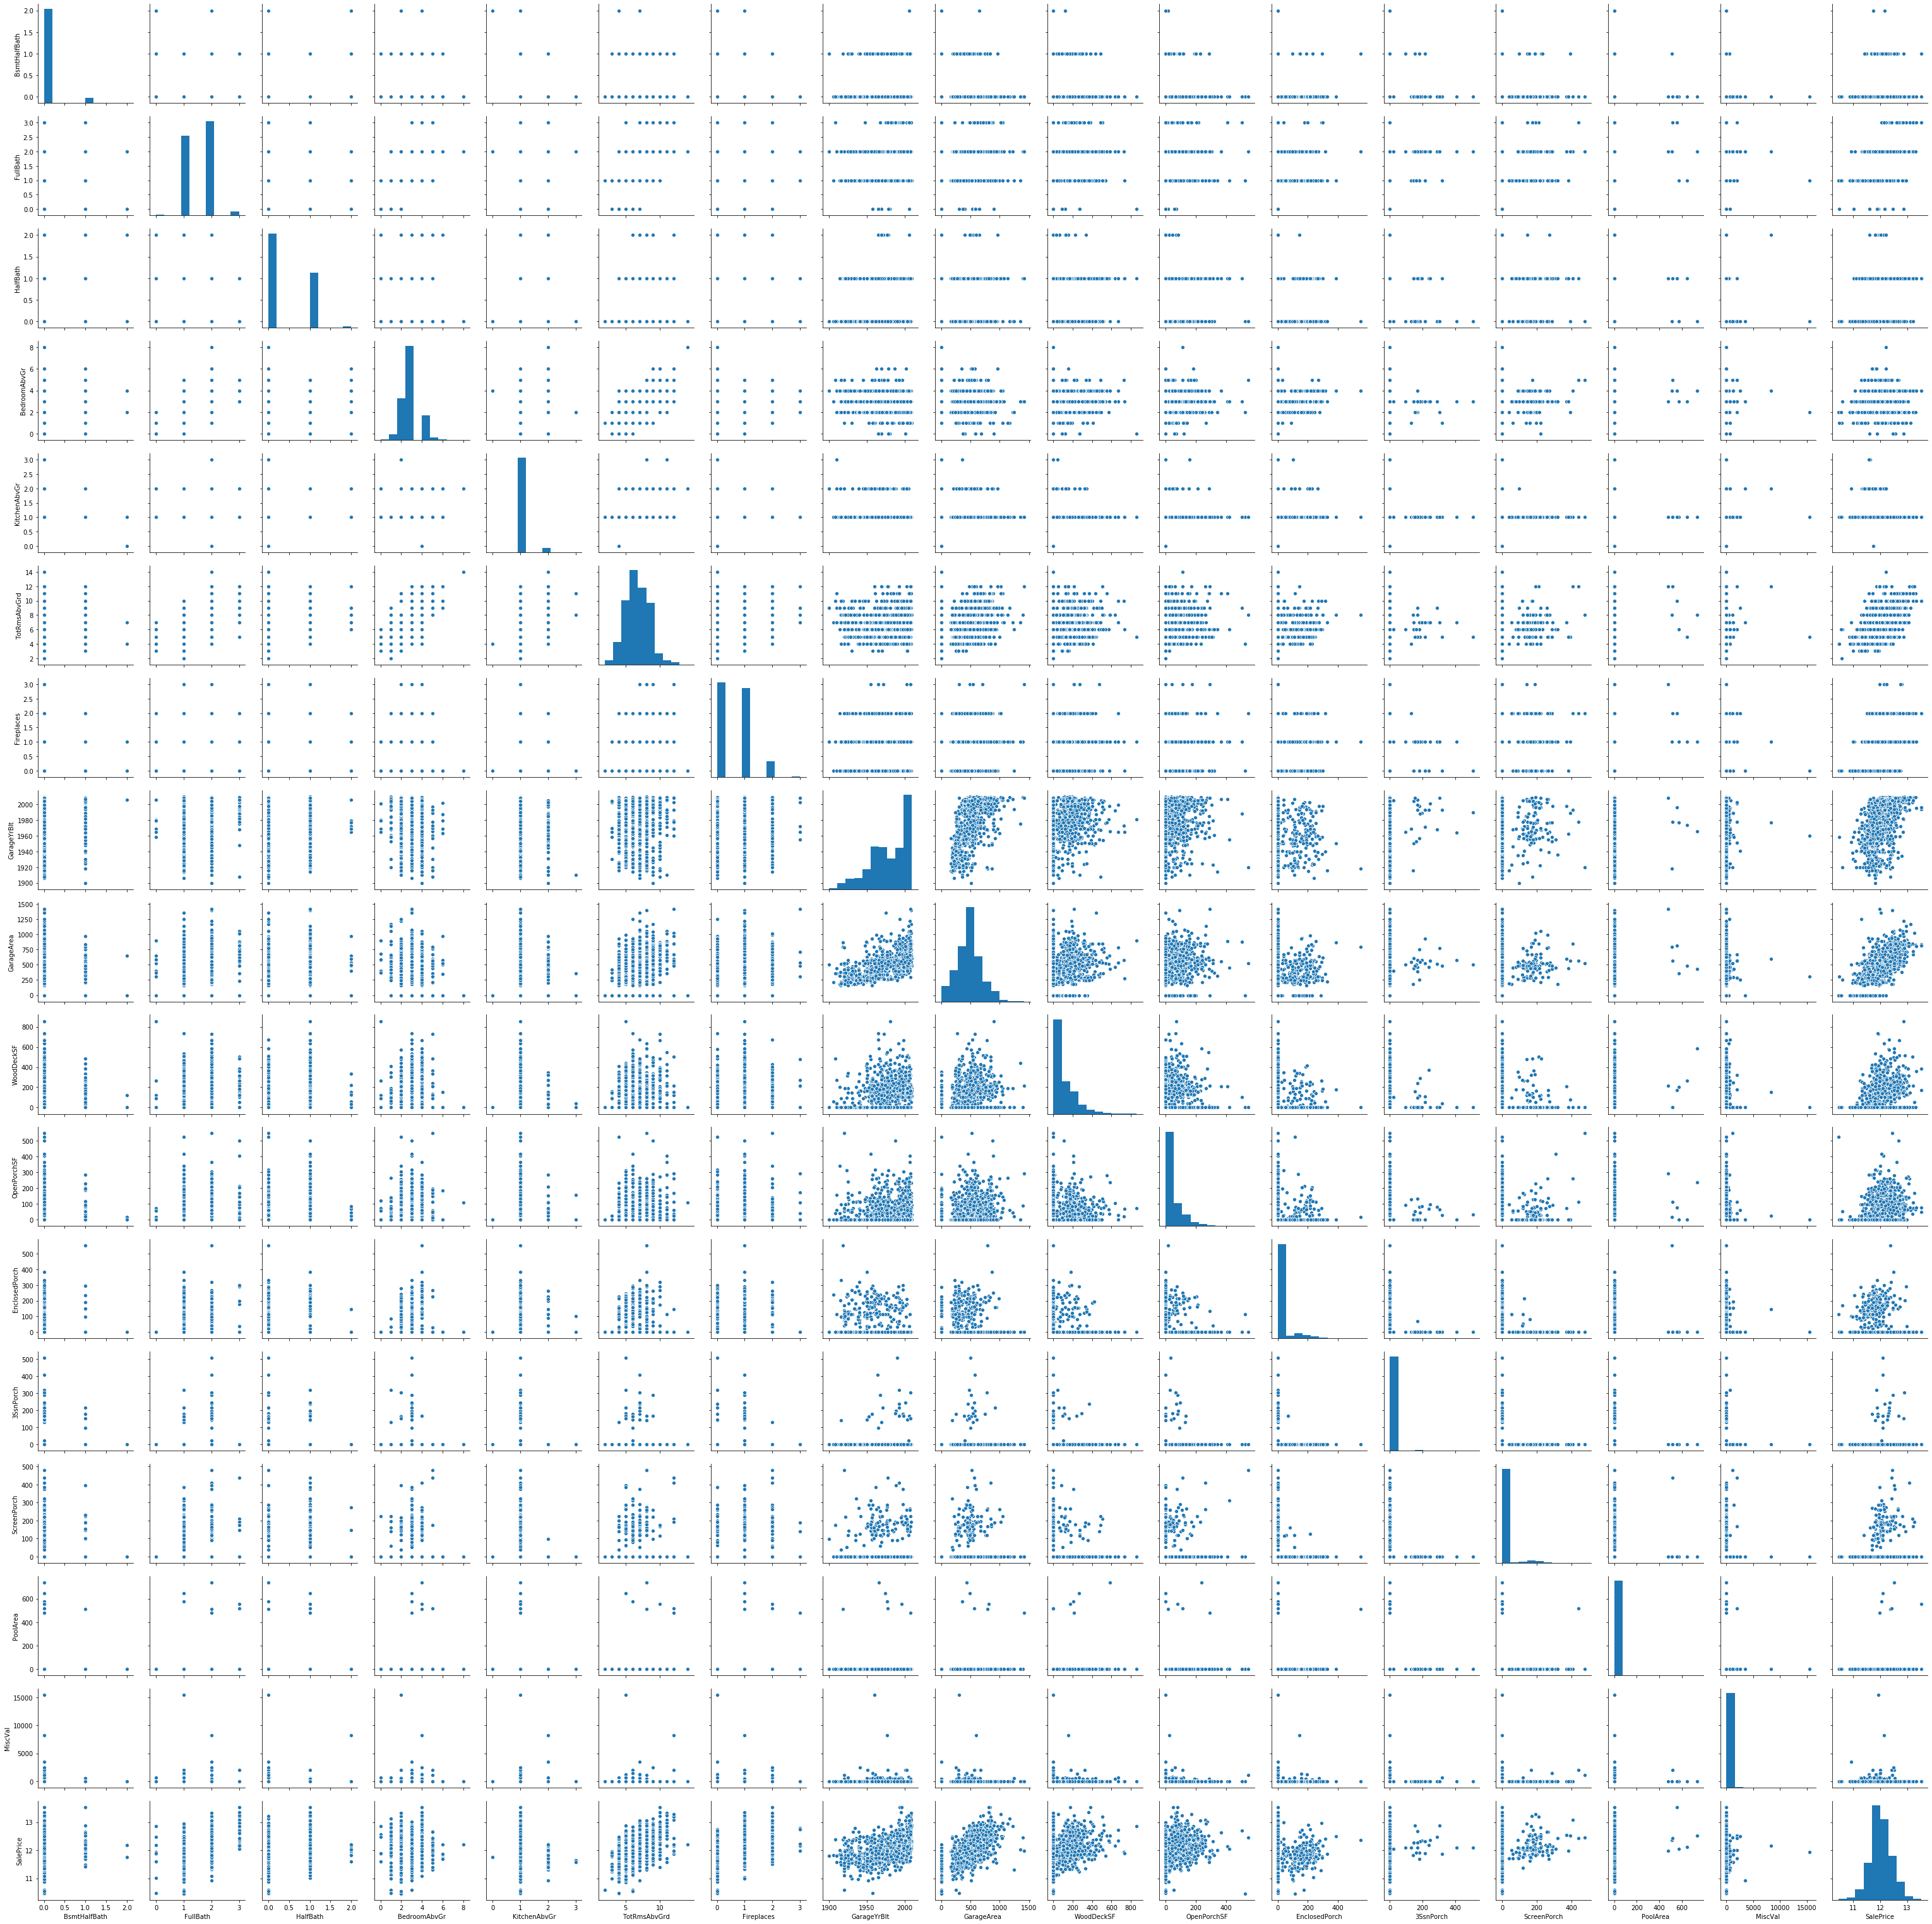

In [20]:
# paiwise scatter plot for housing_numeric2
plt.figure(figsize=(20, 10))
sns.pairplot(housing_numeric2)
plt.show()

**Though the plot is quite hard to read, we see that there are some linear correlations between variables. And also with the target variable ```SalePrice``` (which is the last row and last column in the plot)**

**Let us also plot a heatmap to visualise multiple correlations in one plot.**

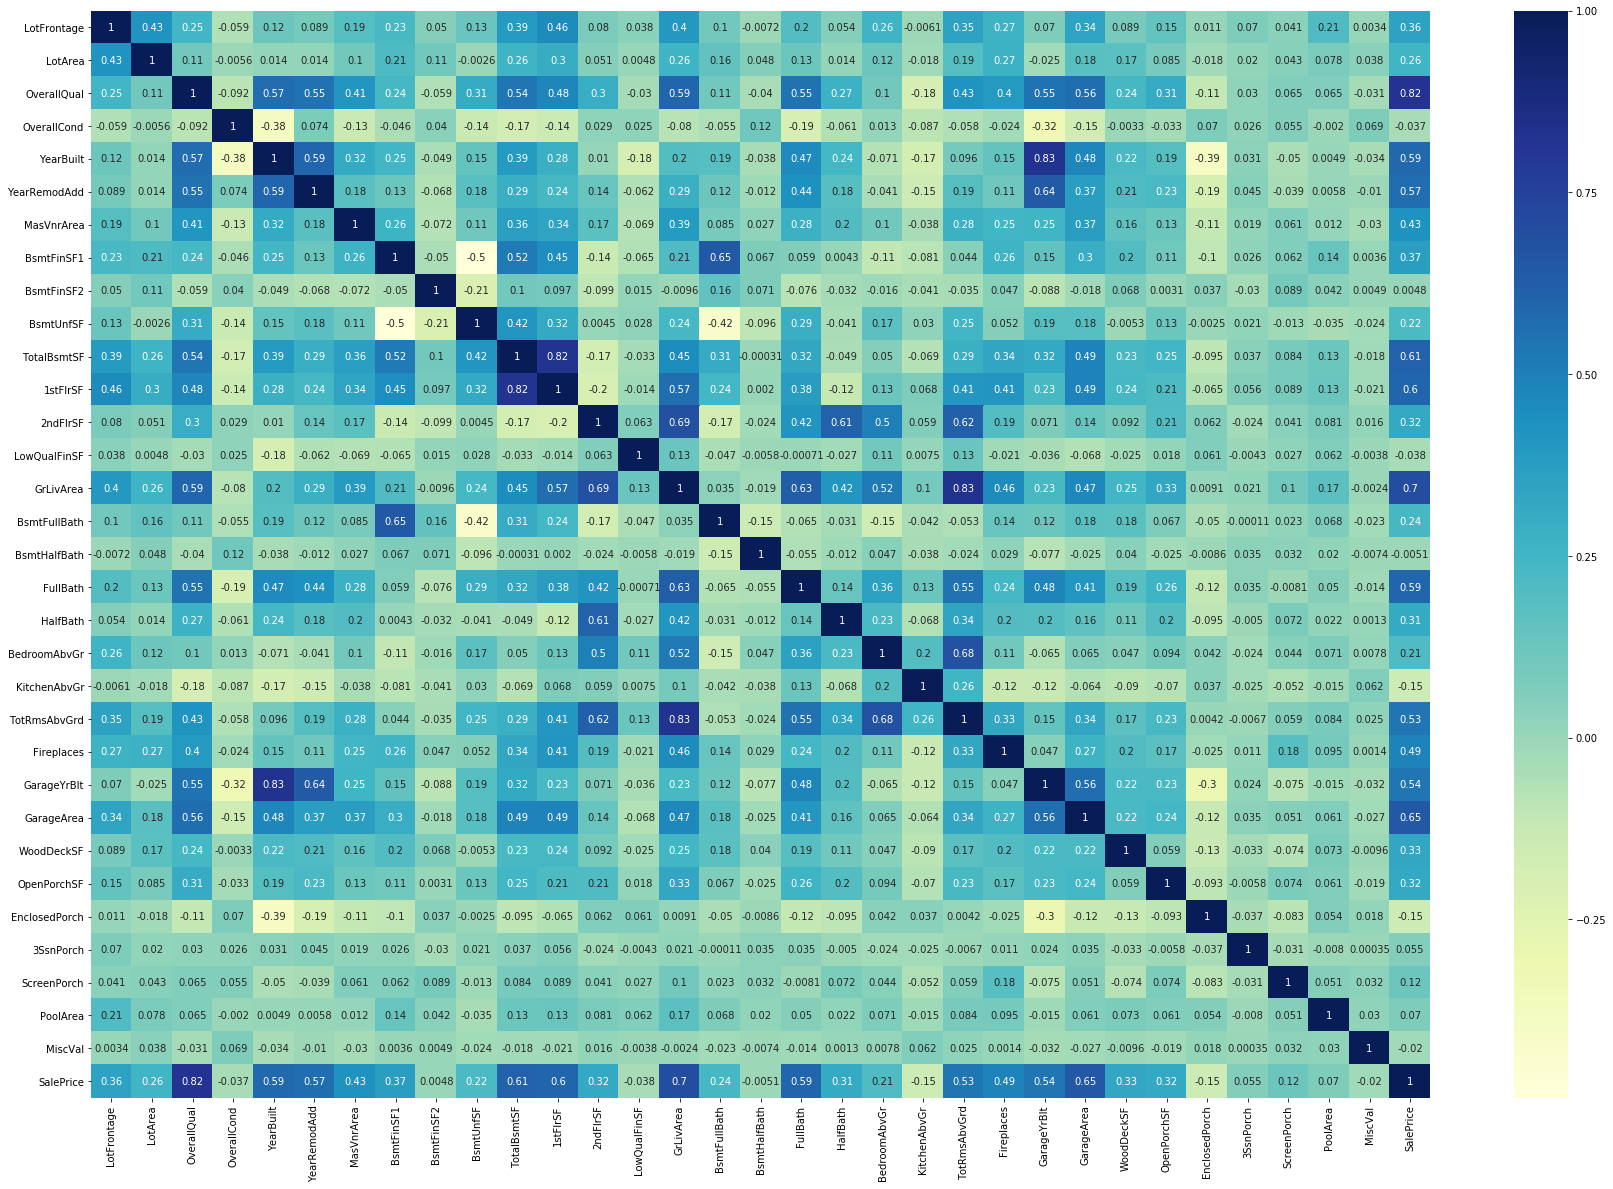

In [21]:
# correlation matrix
hcorr = housing.corr()
# plotting correlations on a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(hcorr, cmap="YlGnBu", annot=True)
plt.show()

The heatmap gives us some useful insights:

Correlation of ```SalePrice``` with independent variables:
- ```SalePrice``` is positively correlated with OverallQual, GrLivArea, GarageArea.

Correlation among independent variables:
- Many independent variables are highly correlated for eg: GrLivArea and TotRmsAbvGrd etc.


Let us now look at our other features.
#### We have 3 year variables- YearBuilt,YearRemodAdd, GarageYrBlt.
Since these directly does not give us any insights. Let us derive some useful features from these.

In [22]:
# Deriving how old the house and the garage is.
max_year = int(housing.YearBuilt.max())
housing['HouseAge'] = max_year - housing['YearBuilt']
housing['GarageAge'] = max_year - housing['GarageYrBlt']

In [23]:
# New Variable that tells if the house was ever remodelled.
housing['RemodAdd'] = np.where(housing['YearRemodAdd'] - housing['YearBuilt']>0, 1, 0)
housing.RemodAdd.value_counts()

0    764
1    696
Name: RemodAdd, dtype: int64

In [24]:
# Dropping columns now not needed.
housing = housing.drop(['YearBuilt','GarageYrBlt','YearRemodAdd'], axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0         60       RL         65.0     8450   NaN      Reg         Lvl   
1         20       RL         80.0     9600   NaN      Reg         Lvl   
2         60       RL         68.0    11250   NaN      IR1         Lvl   
3         70       RL         60.0     9550   NaN      IR1         Lvl   
4         60       RL         84.0    14260   NaN      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... PoolQC Fence  MiscFeature  MiscVal  \
0    Inside      CollgCr       Norm  ...    NaN   NaN          NaN        0   
1       FR2      Veenker      Feedr  ...    NaN   NaN          NaN        0   
2    Inside      CollgCr       Norm  ...    NaN   NaN          NaN        0   
3    Corner      Crawfor       Norm  ...    NaN   NaN          NaN        0   
4       FR2      NoRidge       Norm  ...    NaN   NaN          NaN        0   

  SaleType SaleCondition  SalePrice HouseAge  GarageAge RemodAdd  
0       WD        Normal  12.247694        7        7.0        0  
1       WD        Normal  12.109011       34       34.0        0  
2       WD        Normal  12.317167        9        9.0        1  
3       WD       Abnorml  11.849398       95       12.0        1  
4       WD        Normal  12.429216       10       10.0        0  

[5 rows x 66 columns]

## 3. Data Cleaning and Preparation
### Checking for missing values in our dataset and cleaning them

In [25]:
# Finding missing values percentage (column-wise) and filtering the columns that have missing values
def missing():
    missing = (round((100*housing.isnull().sum()/len(housing.index)),2)).to_frame(name='Missing Percentage')
    missing = missing[missing['Missing Percentage']>0]
    #sorting the values by highest number of missing values
    print(missing.sort_values(by=['Missing Percentage'], ascending=False))

In [26]:
missing()

              Missing Percentage
PoolQC                     99.52
MiscFeature                96.30
Alley                      93.77
Fence                      80.75
FireplaceQu                47.26
LotFrontage                17.74
GarageQual                  5.55
GarageFinish                5.55
GarageType                  5.55
GarageAge                   5.55
BsmtExposure                2.60
BsmtFinType2                2.60
BsmtFinType1                2.53
BsmtCond                    2.53
BsmtQual                    2.53
MasVnrArea                  0.55
MasVnrType                  0.55


We see that the above columns have missing values. Intuitively, we might drop the missing values, but from the data dictionary we understand whether these missing values actually contribute to the data.

In [27]:
#Let us look at the Garage and basement variables. 
#We see from the data dictionary that the below missing values are due to no garage and no basement respectively.
cols = ('GarageType','GarageFinish','GarageQual','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure')
for col in cols:
    print(col,housing[col].unique())

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]


In [28]:
#Other variables with missing values
cols = ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','MasVnrType')
for col in cols:
    print(col,housing[col].unique())   

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


When checking the different values of the above features, we see that the missing values mean that the house does not have that feature, the value hence is not missing but the feature itself is not part of the house. These could affect the price. So, we will impute the nan values with the corresponding values later.

Clearly, ```MasVnrArea``` is 0 where ```MasVnrType``` in not available as both have same amount of missing values.

#### So, for the above variables let us impute valid values for the missing values.

In [29]:
values = {'PoolQC':'No', 'MiscFeature' : 'None', 'Alley': 'None', 'Fence':'None','FireplaceQu':'No',
          'GarageType':'None','GarageFinish':'Non','GarageQual':'No',
          'BsmtQual':'No','BsmtCond':'No','BsmtFinType1':'Non','BsmtFinType2':'Non','BsmtExposure':'No',
          'MasVnrType':'None','MasVnrArea': 0}
housing=housing.fillna(value= values)
missing()

             Missing Percentage
LotFrontage               17.74
GarageAge                  5.55


In [30]:
#Imputing missing GarageAge with 0 and changing it to int type   
housing['GarageAge'].fillna(0,inplace=True)
housing = housing.astype({'GarageAge': int}) 
missing()

             Missing Percentage
LotFrontage               17.74


**Now that we have only ```LotFrontage``` having missing values, let us explore it further.**

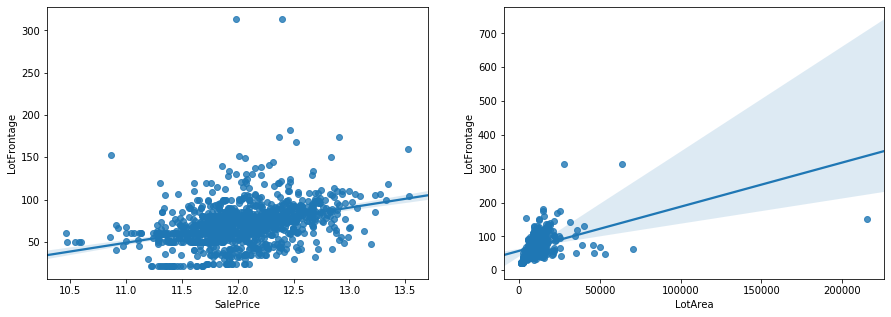

In [31]:
#Plotting LotFrontage against our target variable
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(y='LotFrontage', x='SalePrice', data = housing)
#Plotting LotFrontage against LotArea variable as from data dictionary clearly it seems related
plt.subplot(1, 2, 2)
sns.regplot(y='LotFrontage', x='LotArea', data = housing)
plt.show()

By Definition, ```LotFrontage``` is the lot line separating a lot from the street layout line. The minimum required frontage depends on the zoning district in which a property is located as well as the proposed use.

#### We see that there is definitely a trend of LotFrontage with SalePrice and LotArea. So, it is better not to drop the column.
By Definition, we see that it cannot be 0, we can either choose the minimum or the average of the ```LotFrontage``` as per the ```Neighborhood``` to impute the missing values

In [32]:
housing.groupby('Neighborhood').LotFrontage.describe()

count       mean        std   min    25%   50%     75%    max
Neighborhood                                                               
Blmngtn        14.0  47.142857   4.990100  43.0  43.00  43.0   53.00   53.0
Blueste         2.0  24.000000   0.000000  24.0  24.00  24.0   24.00   24.0
BrDale         16.0  21.562500   1.209339  21.0  21.00  21.0   21.00   24.0
BrkSide        51.0  57.509804  15.528519  50.0  50.00  52.0   60.00  144.0
ClearCr        13.0  83.461538  18.875096  62.0  75.00  80.0   83.00  138.0
CollgCr       126.0  71.682540  16.359291  36.0  64.00  70.0   78.00  122.0
Crawfor        41.0  71.804878  19.436074  40.0  55.00  74.0   82.00  130.0
Edwards        92.0  68.217391  32.431780  24.0  58.75  65.5   74.25  313.0
Gilbert        49.0  79.877551  32.748176  42.0  60.00  65.0   93.00  182.0
IDOTRR         34.0  62.500000  18.282712  40.0  50.00  60.0   64.50  120.0
MeadowV        15.0  27.800000  10.107988  21.0  21.00  21.0   38.50   44.0
Mitchel        36.0  70.083333  22.100259  32.0  58.75  73.0   80.50  129.0
NAmes         186.0  76.462366  23.601905  34.0  69.00  73.0   80.00  313.0
NPkVill         7.0  32.285714  14.150551  24.0  24.00  24.0   38.50   53.0
NWAmes         45.0  81.288889  10.614360  46.0  78.00  80.0   85.00  105.0
NoRidge        33.0  91.878788  25.320147  52.0  81.00  91.0   98.00  174.0
NridgHt        76.0  81.881579  24.991181  34.0  62.75  88.5  101.50  129.0
OldTown       109.0  62.788991  18.170017  30.0  50.00  60.0   63.00  153.0
SWISU          23.0  58.913043  10.539592  50.0  52.00  60.0   60.00  102.0
Sawyer         48.0  74.437500  14.728618  40.0  65.00  71.0   80.00  115.0
SawyerW        50.0  71.500000  14.720872  50.0  63.00  66.5   80.00  116.0
Somerst        78.0  64.666667  22.562276  24.0  47.50  73.5   80.50  116.0
StoneBr        20.0  62.700000  23.445570  39.0  41.00  61.5   80.50  124.0
Timber         30.0  80.133333  23.799063  42.0  68.00  85.0   88.75  150.0
Veenker         7.0  59.714286  25.597619  30.0  35.00  68.0   80.00   90.0

In [33]:
#Imputing the LotFrontage with mean value in the Neighborhood
housing['LotFrontage'].fillna(housing.groupby('Neighborhood')['LotFrontage'].transform('mean'),inplace=True)

In [34]:
missing()
housing.shape

Empty DataFrame
Columns: [Missing Percentage]
Index: []


(1460, 66)

#### Now that we do not have any missing values, let us continue exploring our dataset.

We have many columns that we see from the data disctionary that are quality based variables for e.g.: ```ExterQual```, ```GarageQual```, ```KitchenQual```, etc. Clearly these are ordinal in nature, so instead of taking them as categorical, we change them to numeric for a better representation similar to the ones we already have ```OverallQual``` and ```OverallCond```.

In [35]:
# Changing all ordinal quality variables to numeric
qual = [ 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'PoolQC',]
values = {'Ex' : 5,
'Gd' : 4,
'TA' : 3,
'Fa' : 2,
'Po' : 1,
'No' : 0}
housing[qual] = housing[qual].replace(values)

In [36]:
# Updating the numeric and categorical variables subsets 
#all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['int64','float64'])
print("Numeric Columns :\n", housing_numeric.columns)
# subset of all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
print("Categorical Columns:\n",housing_categorical.columns)

Numeric Columns :
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'SalePrice',
       'HouseAge'],
      dtype='object')
Categorical Columns:
 Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageFinish', 'Fence',

### Data Preparation 

Let's now prepare the data to build the model.

In [37]:
# split into X and y
X = housing.loc[:, housing.columns !='SalePrice']

y = housing['SalePrice']

In [38]:
# creating dummy variables for categorical variables

# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 160 columns]

In [39]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [40]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [41]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=201)

In [42]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

## 4. Model Building

## Ridge Regression

Let's now try predicting house prices, to perform ridge and lasso regression.

In [43]:
# list of alphas to tune
params = {'alpha': [.00001,.0001,.001, .01, .1, 1, 10, 20, 50, 100, 500, 1000]}

#Using Ridge Regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20,
                                   50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=6000]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006007      0.001362         0.001252        0.000293       1e-05   
1       0.005711      0.000901         0.001586        0.000489      0.0001   
2       0.006817      0.000978         0.001406        0.000482       0.001   
3       0.006857      0.000365         0.001537        0.000760        0.01   
4       0.008460      0.001032         0.002015        0.001120         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.167952          -0.097173          -0.109523   
1  {'alpha': 0.0001}          -0.167937          -0.097173          -0.109521   
2   {'alpha': 0.001}          -0.167784          -0.097172          -0.109498   
3    {'alpha': 0.01}          -0.166294          -0.097167          -0.109273   
4     {'alpha': 0.1}          -0.154271          -0.097119          -0.107780   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.091471  ...        -0.115105        0.027385               12   
1          -0.091471  ...        -0.115101        0.027379               11   
2          -0.091467  ...        -0.115064        0.027322               10   
3          -0.091435  ...        -0.114705        0.026761                9   
4          -0.091151  ...        -0.111851        0.022261                8   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.069683           -0.066304           -0.069799   
1           -0.069683           -0.066304           -0.069800   
2           -0.069685           -0.066304           -0.069800   
3           -0.069712           -0.066305           -0.069803   
4           -0.070017           -0.066314           -0.069823   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.078084           -0.075621         -0.071898         0.004306  
1           -0.078084           -0.075621         -0.071898         0.004306  
2           -0.078084           -0.075621         -0.071899         0.004306  
3           -0.078083           -0.075623         -0.071905         0.004303  
4           -0.078072           -0.075645         -0.071974         0.004270  

[5 rows x 21 columns]

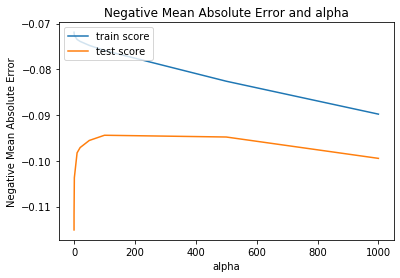

In [45]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Looking at the graph, we try to choose the optimal value of alpha for Ridge Regression**

In [46]:
#choosing optimal alpha and modelling
alpha = 560
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.04786131e-03,  1.18529557e-02,  4.07159021e-02,  2.48223188e-02,
        6.79853250e-03,  1.56433168e-02,  1.94339294e-03,  1.74789408e-02,
        8.04370089e-03,  9.03657428e-03,  3.69071841e-03,  4.36718306e-03,
        1.51506303e-02,  1.33086815e-02,  2.50018291e-02,  1.52206822e-02,
       -2.48481851e-04,  3.10146291e-02,  1.41973194e-02,  6.51097981e-04,
        2.14455120e-02,  1.38344716e-02,  1.14177145e-02, -8.86905912e-03,
        2.22747776e-02,  2.15936712e-02,  1.47996717e-02,  2.03653589e-02,
        2.45173035e-02,  1.14352060e-02,  1.21488518e-02,  1.78700758e-03,
        1.35675418e-03,  5.37690937e-03,  6.35176208e-03, -3.84356355e-03,
       -5.89253088e-03, -2.05974245e-05, -1.56664380e-02, -9.10954040e-03,
        4.05315446e-03, -1.88717133e-02, -1.57266743e-03, -1.86979176e-03,
       -1.67116270e-04,  1.71312769e-03,  7.47521565e-03,  4.91446240e-03,
       -2.34028017e-03, -1.47208818e-04, -5.89127324e-04, -3.65788315e-03,
       -8.53622131e-03, -

In [47]:
# model with optimal alpha for Ridge
# Ridge regression
import sklearn.metrics as metrics 
# predict
y_train_pred = ridge.predict(X_train)

print("Ridge Regression: ")
print("Train Score:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge Regression: 
Train Score: 0.9011776238840906
Test Score: 0.8721583579989824


In [49]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# Top Ridge Columns selected by the Ridge Regression
print("Top Columns obtained after Ridge Regression")
ridge_cols = list(zip(cols, model_parameters))
top_ridge_cols = [i  for i in ridge_cols if abs(i[1])> 0.018]
sorted(top_ridge_cols, key = lambda x: x[1], reverse=True)

Top Columns obtained after Ridge Regression


[('constant', 12.024),
 ('OverallQual', 0.041),
 ('GrLivArea', 0.031),
 ('OverallCond', 0.025),
 ('1stFlrSF', 0.025),
 ('GarageArea', 0.025),
 ('KitchenQual', 0.022),
 ('TotRmsAbvGrd', 0.022),
 ('FullBath', 0.021),
 ('FireplaceQu', 0.02),
 ('MSSubClass_30', -0.019)]

So, We see that we have a good R-sqaured value of **90.11% for train** and **87.21% for test** when using Ridge Regression.

And the some of the top variables that describe our target variable ```SalePrice```, as chosen by Ridge are: ```'OverallQual','GrLivArea',''OverallCond','1stFlrSF','KitchenQual'```. 

All of these affecting the ```SalePrice``` positively meaning a house with these parameters high will fetch a higher price, while ```MSSubClass_30``` affects the ```SalePrice``` negatively meaning a house classified under this subsclass will fetch a lower price.

## Lasso Regression

In [50]:
#Model Building with Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20,
                                   50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.160768      0.030135         0.002002        0.000632       1e-05   
1       0.135152      0.028331         0.001608        0.000802      0.0001   
2       0.113371      0.046097         0.002100        0.000843       0.001   
3       0.015991      0.002438         0.001940        0.000800        0.01   
4       0.008467      0.001386         0.001987        0.000011         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.148631          -0.097139          -0.105942   
1  {'alpha': 0.0001}          -0.140577          -0.095869          -0.103409   
2   {'alpha': 0.001}          -0.094517          -0.093798          -0.100668   
3    {'alpha': 0.01}          -0.089800          -0.101880          -0.100664   
4     {'alpha': 0.1}          -0.158309          -0.169634          -0.160742   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.090813  ...        -0.110222        0.020248                4   
1          -0.088333  ...        -0.106786        0.017991                3   
2          -0.081160  ...        -0.093159        0.006459                1   
3          -0.083740  ...        -0.094272        0.006791                2   
4          -0.156875  ...        -0.161494        0.004437                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.070260           -0.066313           -0.069852   
1           -0.070684           -0.066467           -0.069657   
2           -0.076085           -0.068501           -0.070627   
3           -0.089931           -0.081413           -0.084577   
4           -0.160576           -0.154474           -0.158867   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.078067           -0.075654         -0.072029         0.004246  
1           -0.077998           -0.075799         -0.072121         0.004199  
2           -0.079147           -0.078188         -0.074510         0.004212  
3           -0.091133           -0.091092         -0.087629         0.003938  
4           -0.160578           -0.164742         -0.159847         0.003312  

[5 rows x 21 columns]

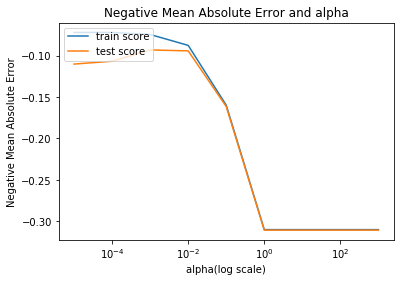

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha(log scale)')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Looking at the graph, we try to choose the optimal value of alpha for Lasso Regression**

In [53]:
#Choosing optimal alpha for Lasso
alpha = 0.005

lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 
#Lasso Coefficients
lasso.coef_

array([-0.00000000e+00,  1.16240564e-02,  8.43445269e-02,  3.96476584e-02,
        0.00000000e+00,  2.49917243e-03,  0.00000000e+00,  2.66288400e-02,
        1.03518393e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.30721109e-03,  1.30326129e-02,  1.26869074e-02,  0.00000000e+00,
       -0.00000000e+00,  8.92400695e-02,  2.24270845e-02,  0.00000000e+00,
        1.88157891e-02,  1.08294625e-02,  3.98198365e-03, -1.02120785e-02,
        2.08622211e-02,  1.39738905e-02,  0.00000000e+00,  2.83375179e-02,
        3.58663334e-02,  4.15146637e-03,  7.84429314e-03, -0.00000000e+00,
        0.00000000e+00,  2.05157005e-03,  3.05870011e-03, -0.00000000e+00,
       -1.34646209e-02, -0.00000000e+00, -3.76211889e-02, -0.00000000e+00,
        0.00000000e+00, -1.77346039e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -8.96183339e-03, -

In [54]:
# model with optimal alpha
# lasso regression
import sklearn.metrics as metrics 
# predict
y_train_pred = lasso.predict(X_train)

print("Lasso Regression: ")
print("Train Score:", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print("Test Score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Lasso Regression: 
Train Score: 0.90355315467762
Test Score: 0.8848949647948056


In [56]:
# lasso model top parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Top Columns obtained after Lasso Regression")
lasso_cols = list(zip(cols, model_parameters))
top_cols = [i  for i in lasso_cols if abs(i[1])> 0.02]
sorted(top_cols, key = lambda x: x[1], reverse=True)

Top Columns obtained after Lasso Regression


[('constant', 12.024),
 ('GrLivArea', 0.089),
 ('OverallQual', 0.084),
 ('OverallCond', 0.04),
 ('GarageArea', 0.036),
 ('FireplaceQu', 0.028),
 ('BsmtQual', 0.027),
 ('BsmtFullBath', 0.022),
 ('Neighborhood_Somerst', 0.022),
 ('KitchenQual', 0.021),
 ('HouseAge', -0.038)]

So, We see that we have a good R-sqaured value of **90.35% for train** and **88.4% for test** when using Lasso Regression.

And the some of the top variables that describe our target variable ```SalePrice```, as chosen by Lasso are: ```'GrLivArea','OverallQual','GarageArea','OverallCond','FireplaceQu'```. 

All of the above affecting the ```SalePrice``` positively, meaning a house with these parameters high will fetch a higher price.

While ```HouseAge``` affects the ```SalePrice``` negatively meaning a house with higher age i.e. an older house will fetch a lower price.


## Part ll
### Below are the changes in the model if we choose double the value of alpha for both ridge and lasso.

In [57]:
#Ridge Regression
alpha = 560*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print("Ridge Regression:")
print("Train Score:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Top Columns obtained by Ridge after doubling the alpha:")
list(zip(cols, model_parameters))
ridge_cols = list(zip(cols, model_parameters))
top_ridge_cols = [i  for i in ridge_cols if abs(i[1])> 0.016]
sorted(top_ridge_cols, key = lambda x: x[1], reverse=True)

Ridge Regression:
Train Score: 0.8851184497965572
Test Score: 0.8588823975401573
Top Columns obtained by Ridge after doubling the alpha:


[('constant', 12.024),
 ('OverallQual', 0.034),
 ('GrLivArea', 0.027),
 ('1stFlrSF', 0.022),
 ('GarageArea', 0.022),
 ('KitchenQual', 0.021),
 ('TotRmsAbvGrd', 0.02),
 ('FullBath', 0.019),
 ('FireplaceQu', 0.019),
 ('OverallCond', 0.018),
 ('ExterQual', 0.017)]

In [58]:
#Lasso Regression
alpha = 0.005*2

lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 
# model with double alpha
# predict
y_train_pred = lasso.predict(X_train)
print("Lasso Regression:")
print("Train Score:", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print("Test Score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# lasso model top parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Top Columns obtained by Lasso after doubling the alpha:")
lasso_cols = list(zip(cols, model_parameters))
top_cols = [i  for i in lasso_cols if abs(i[1])> 0.014]
sorted(top_cols, key = lambda x: x[1], reverse=True)

Lasso Regression:
Train Score: 0.8877112584724051
Test Score: 0.8741120883124741
Top Columns obtained by Lasso after doubling the alpha:


[('constant', 12.023),
 ('OverallQual', 0.095),
 ('GrLivArea', 0.091),
 ('GarageArea', 0.041),
 ('OverallCond', 0.033),
 ('BsmtQual', 0.029),
 ('FireplaceQu', 0.029),
 ('KitchenQual', 0.024),
 ('BsmtFullBath', 0.019),
 ('HeatingQC', 0.015),
 ('HouseAge', -0.045)]

### Below are the changes in the model if five most important predictor variables in the lasso model are not available in the incoming data

Excluding the variables ```'GrLivArea' , 'OverallQual','GarageArea','OverallCond' and 'HouseAge'``` from the dataset.

In [59]:
housing = housing.drop(['GrLivArea' , 'OverallQual','GarageArea','OverallCond' ,'HouseAge'], axis = 1)
# Updating the numeric and categorical varibales subsets 
#all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['int64','float64'])
# subset of all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0         60       RL         65.0     8450  None      Reg         Lvl   
1         20       RL         80.0     9600  None      Reg         Lvl   
2         60       RL         68.0    11250  None      IR1         Lvl   
3         70       RL         60.0     9550  None      IR1         Lvl   
4         60       RL         84.0    14260  None      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... PoolArea PoolQC Fence MiscFeature  \
0    Inside      CollgCr       Norm  ...        0      0  None        None   
1       FR2      Veenker      Feedr  ...        0      0  None        None   
2    Inside      CollgCr       Norm  ...        0      0  None        None   
3    Corner      Crawfor       Norm  ...        0      0  None        None   
4       FR2      NoRidge       Norm  ...        0      0  None        None   

  MiscVal SaleType  SaleCondition  SalePrice  GarageAge RemodAdd  
0       0       WD         Normal  12.247694          7        0  
1       0       WD         Normal  12.109011         34        0  
2       0       WD         Normal  12.317167          9        1  
3       0       WD        Abnorml  11.849398         12        1  
4       0       WD         Normal  12.429216         10        0  

[5 rows x 61 columns]

In [60]:
# split into X and y
X = housing.loc[:, housing.columns !='SalePrice']

y = housing['SalePrice']
# creating dummy variables for categorical variables

# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 160 columns]

In [61]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.3s finished


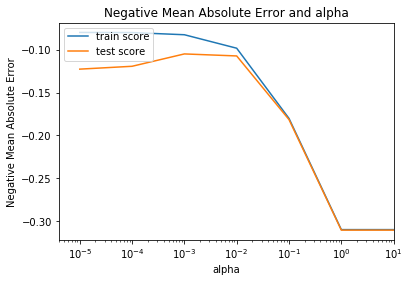

In [62]:
# New Model Building with Lasso

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.xlim([10^-5, 10])
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
#Lasso Regression
alpha = 0.005

lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 
# model with double alpha
# predict
y_train_pred = lasso.predict(X_train)
print("Train Score:", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print("Test Score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# lasso model top parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("New Columns by Lasso :")
lasso_cols = list(zip(cols, model_parameters))
top_cols = [i  for i in lasso_cols if abs(i[1])> 0.026]
sorted(top_cols, key = lambda x: x[1], reverse=True)

Train Score: 0.8862777145279516
Test Score: 0.8565179669468275
New Columns by Lasso :


[('constant', 12.023),
 ('1stFlrSF', 0.093),
 ('2ndFlrSF', 0.064),
 ('KitchenQual', 0.04),
 ('BsmtQual', 0.035),
 ('FireplaceQu', 0.034),
 ('FullBath', 0.031),
 ('GarageQual', 0.031),
 ('Neighborhood_Somerst', 0.03),
 ('Neighborhood_NridgHt', 0.029),
 ('MSSubClass_30', -0.029)]

**The top variables  now become ```'1stFlrSF' ,'2ndFlrSF','KitchenQual', 'FireplaceQu','BsmtQual'```.**